<a href="https://colab.research.google.com/github/HoangSon2511/AI-Project/blob/main/NhanDangThucAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from keras import datasets, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

food = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
dir_train = '/content/drive/MyDrive/Food' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in food:
    path = os.path.join(dir,i)
    index_label = food.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
x_train = x_train.reshape(100,150*150*3)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape)
print(y_train.shape)

(100, 67500)
(100, 5)


In [14]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(256, activation='relu', name='layer2'))
model.add(Dense(128, activation='relu', name='layer3'))
model.add(Dense(5, activation='softmax', name='layer4'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 5)                 645       
                                                                 
Total params: 34,725,381
Trainable params: 34,725,381
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 50)
model.save('food.h5')

Epoch 1/50
4/4 [==============================] - 2s 186ms/step - loss: 39.0012 - accuracy: 0.1800
Epoch 2/50
4/4 [==============================] - 1s 184ms/step - loss: 63.2684 - accuracy: 0.2000
Epoch 3/50
4/4 [==============================] - 1s 192ms/step - loss: 28.4820 - accuracy: 0.2000
Epoch 4/50
4/4 [==============================] - 1s 176ms/step - loss: 41.1624 - accuracy: 0.2000
Epoch 5/50
4/4 [==============================] - 1s 185ms/step - loss: 22.4086 - accuracy: 0.3400
Epoch 6/50
4/4 [==============================] - 1s 183ms/step - loss: 13.7885 - accuracy: 0.3100
Epoch 7/50
4/4 [==============================] - 1s 178ms/step - loss: 4.2597 - accuracy: 0.3600
Epoch 8/50
4/4 [==============================] - 1s 174ms/step - loss: 2.9156 - accuracy: 0.4700
Epoch 9/50
4/4 [==============================] - 1s 185ms/step - loss: 6.6051 - accuracy: 0.4900
Epoch 10/50
4/4 [==============================] - 1s 179ms/step - loss: 2.9856 - accuracy: 0.4000
Epoch 11/50
4

In [7]:
score = model.evaluate(x_train, y_train)
print('do chinh xac',score)

4/4 [==============================] - 0s 50ms/step - loss: 0.0053 - accuracy: 1.0000
do chinh xac [0.005255818832665682, 1.0]


1/1 [==============================] - 0s 36ms/step
tomnuong


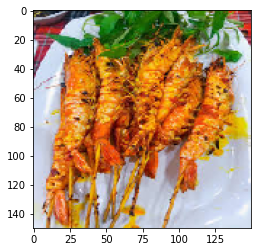

In [12]:
pic = load_img('/content/drive/MyDrive/Food/tomnuong/20.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])
# nhận dạng sai do ít dữ liệu train

1/1 [==============================] - 0s 36ms/step
banhcuon


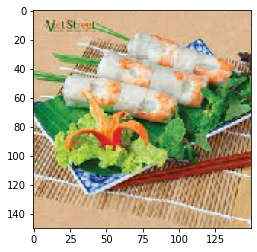

In [11]:
pic = load_img('/content/drive/MyDrive/Food/banhcuon/10.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])